<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/IR290and50RatiosMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

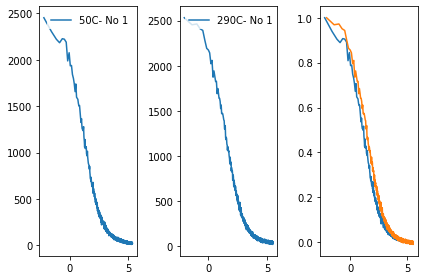

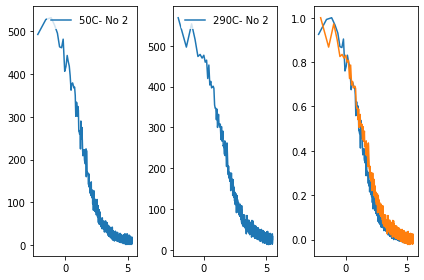

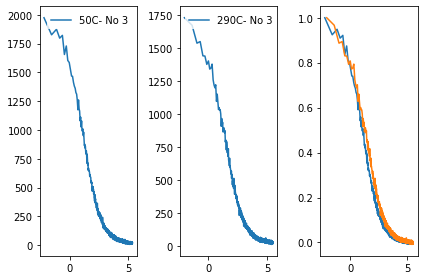

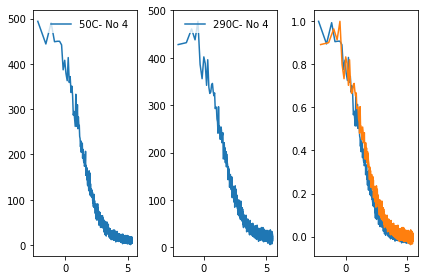

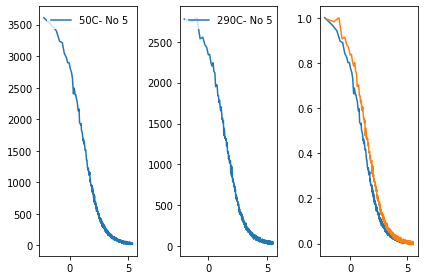

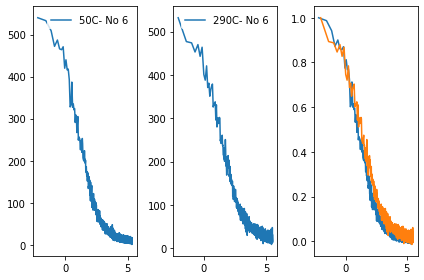

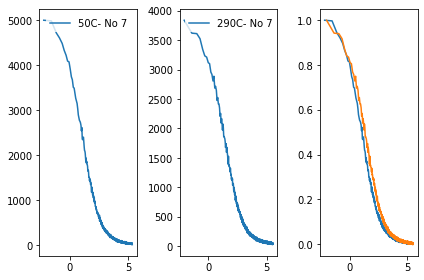

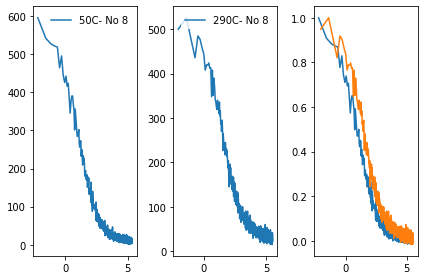

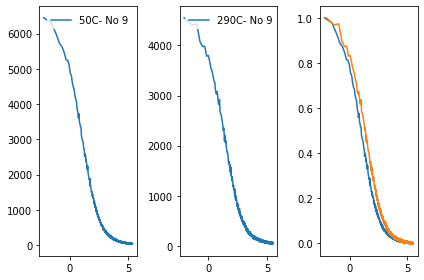

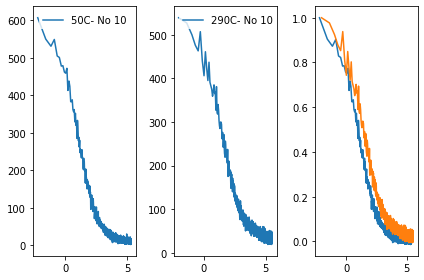

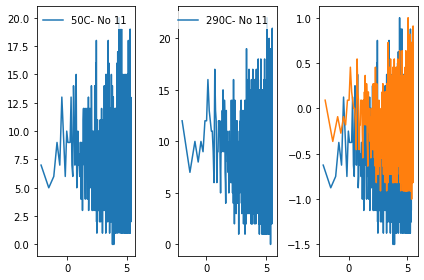

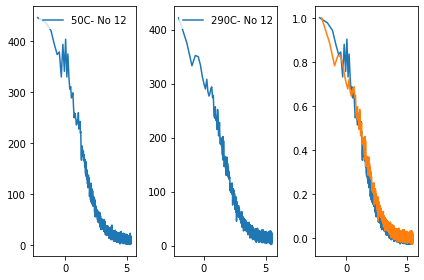

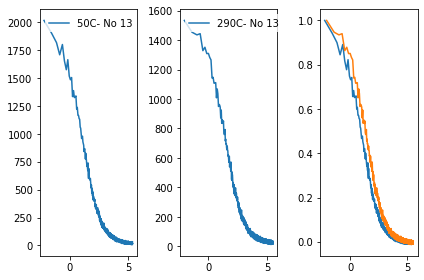

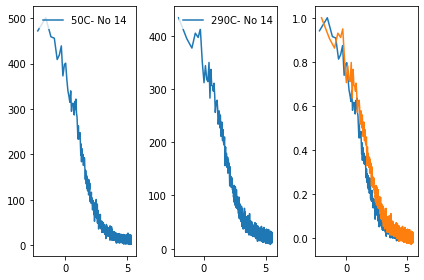

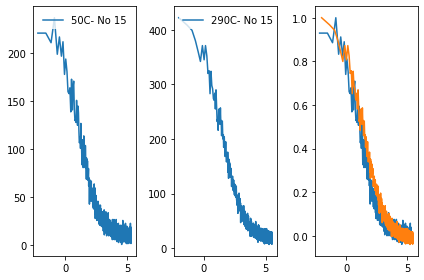

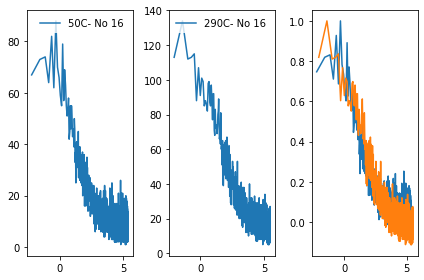

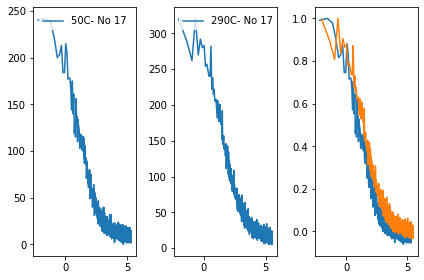

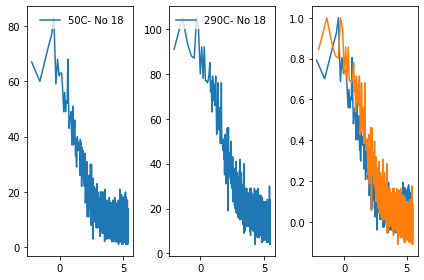

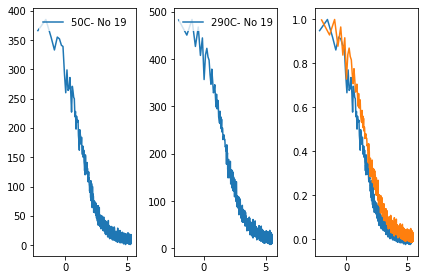

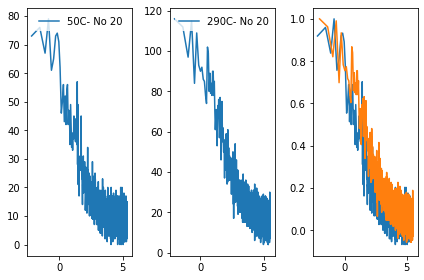

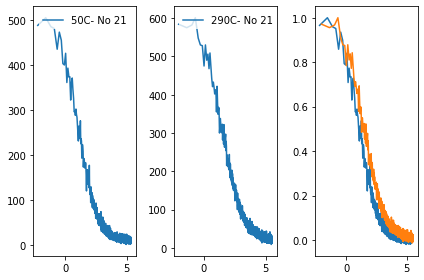

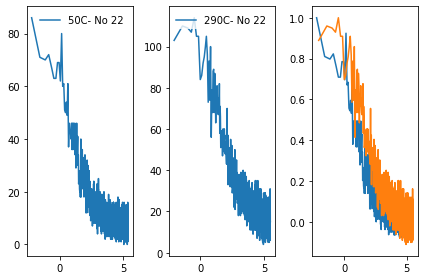

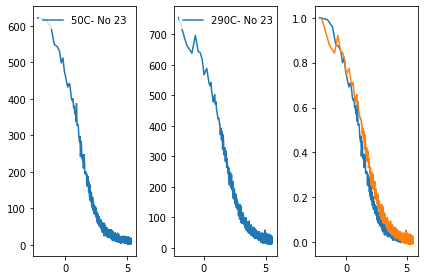

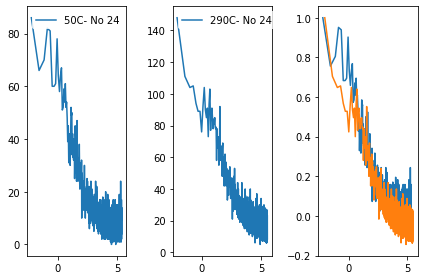

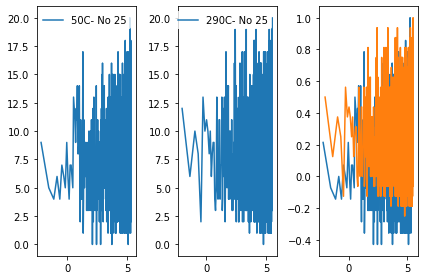

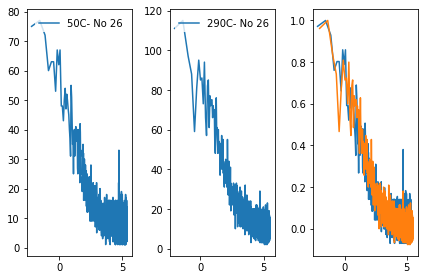

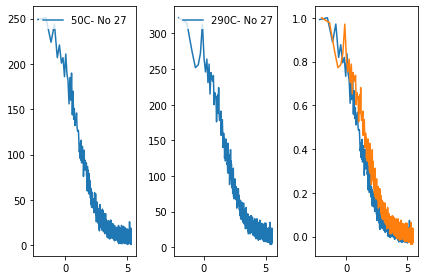

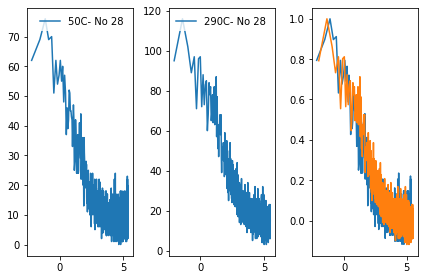

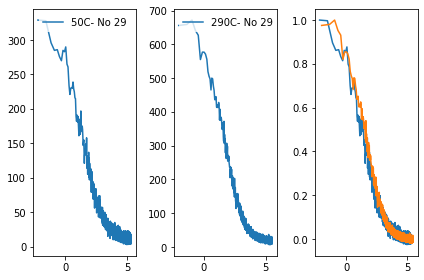

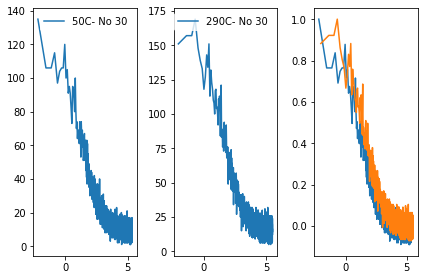

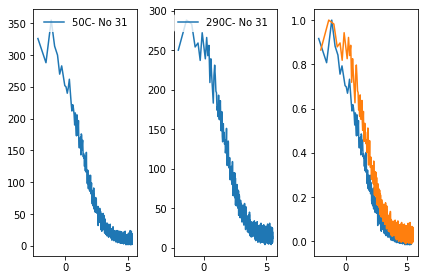

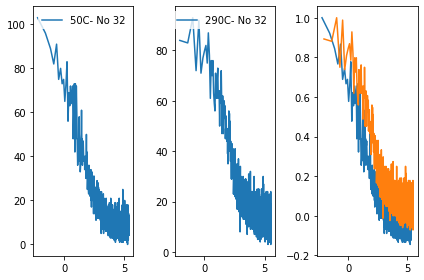

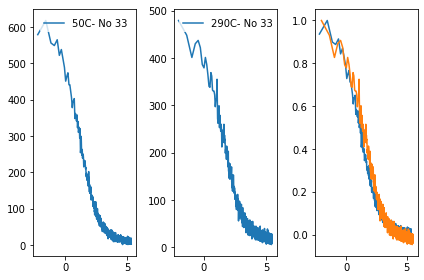

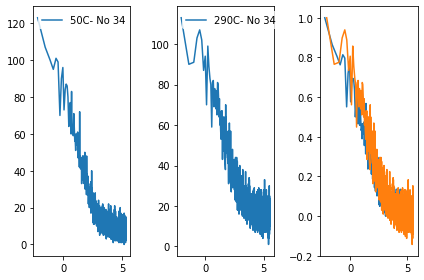

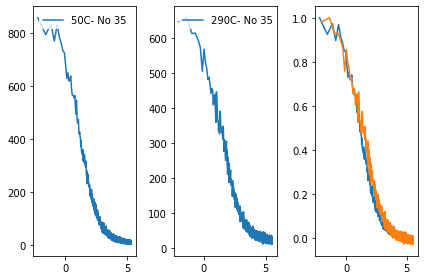

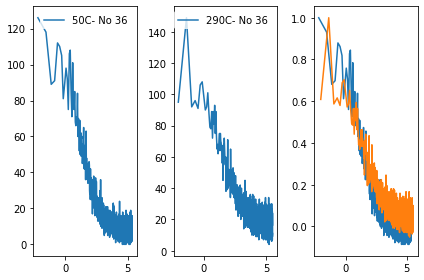

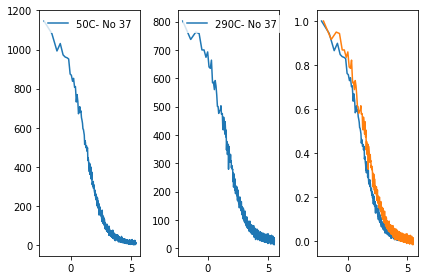

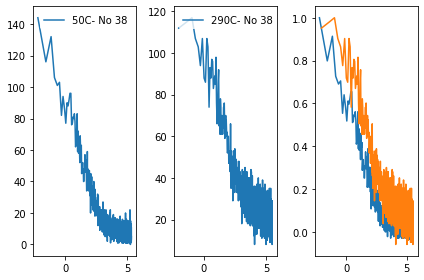

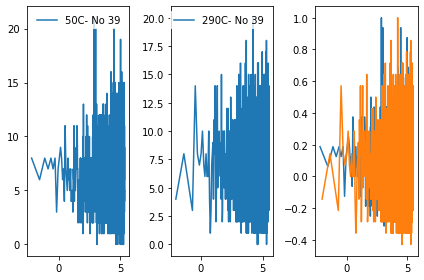

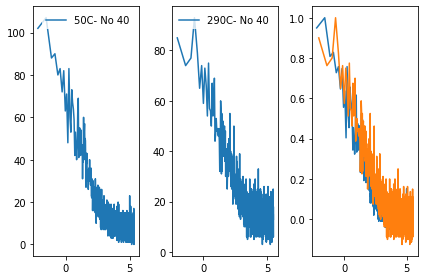

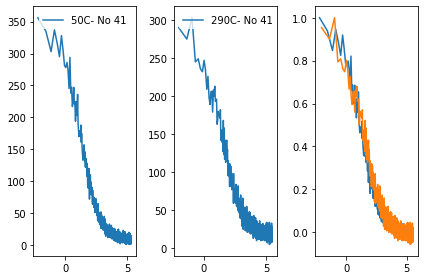

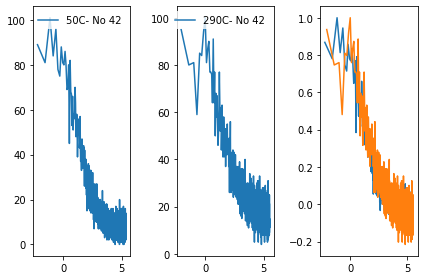

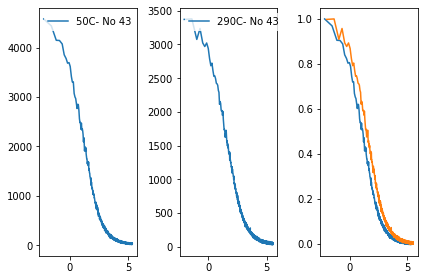

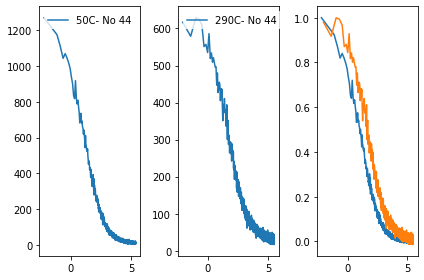

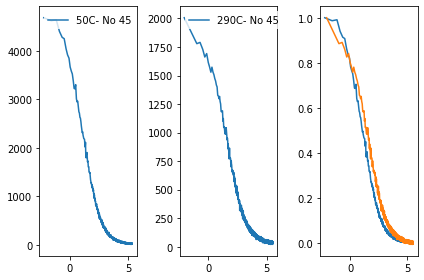

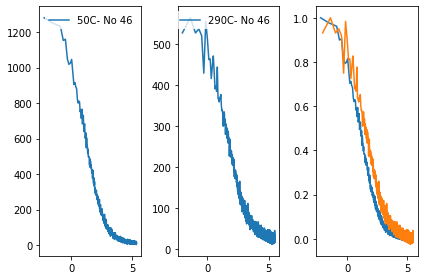

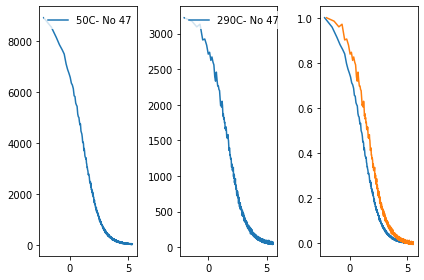

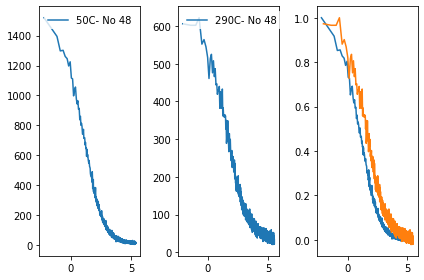

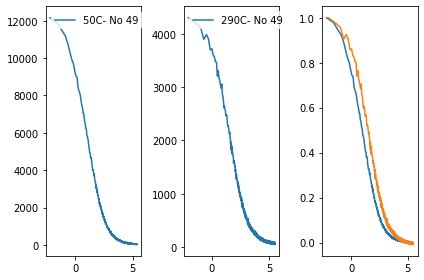

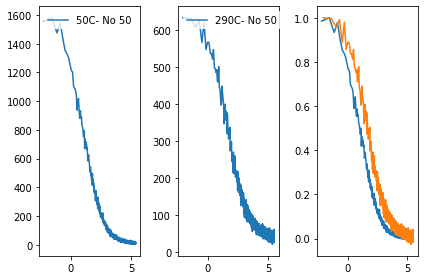

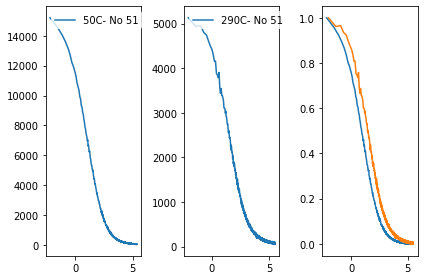

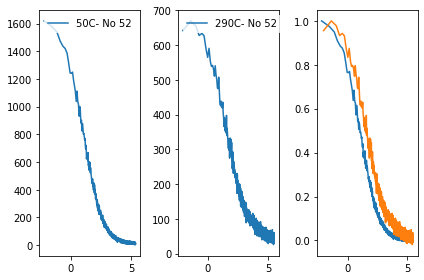

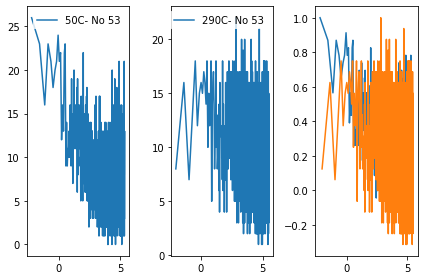

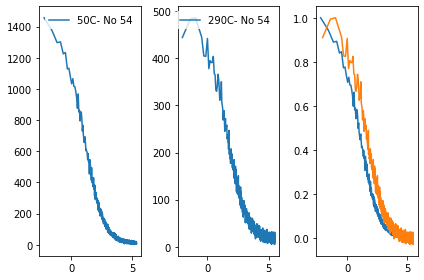

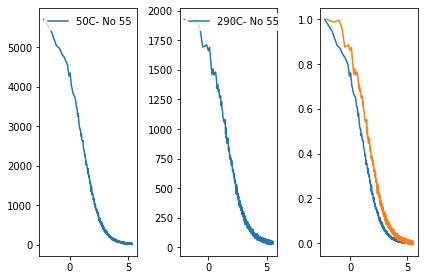

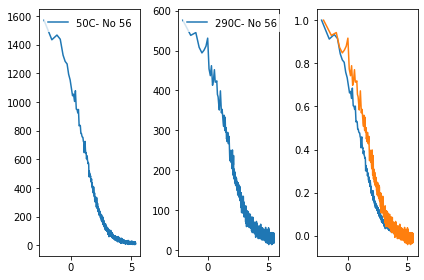

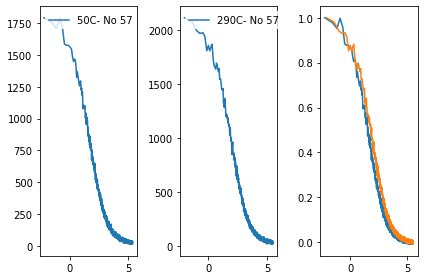

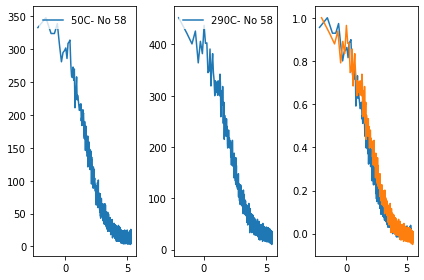

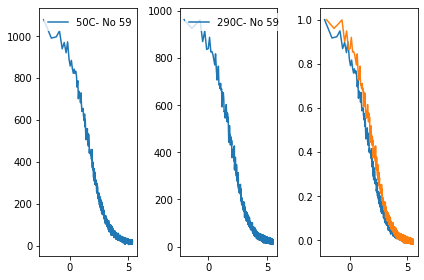

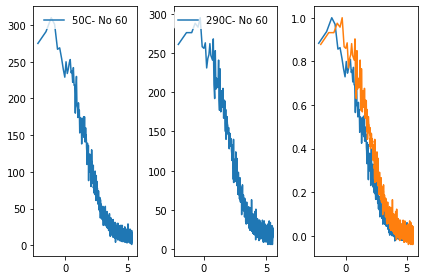

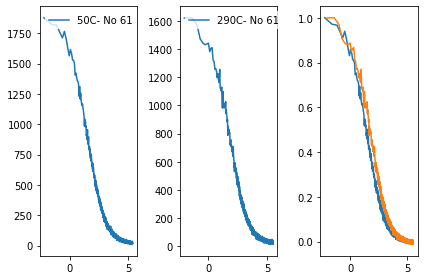

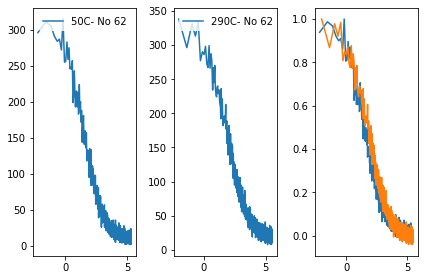

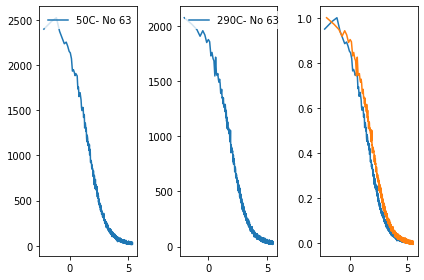

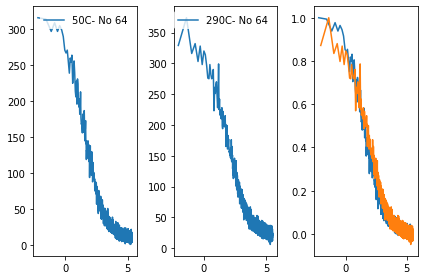

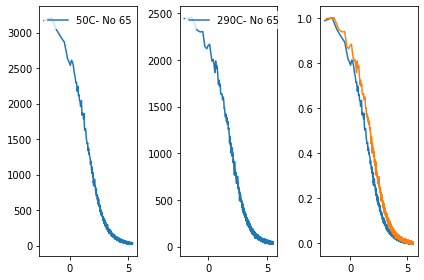

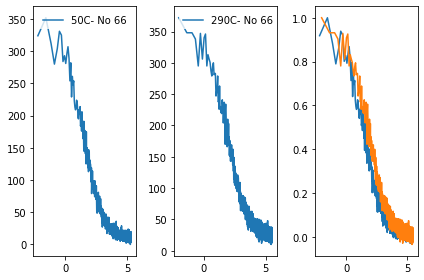

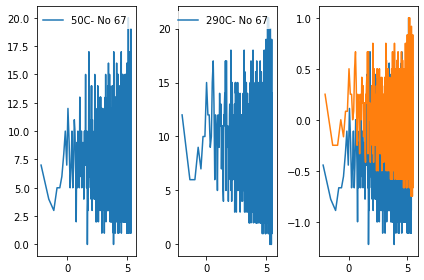

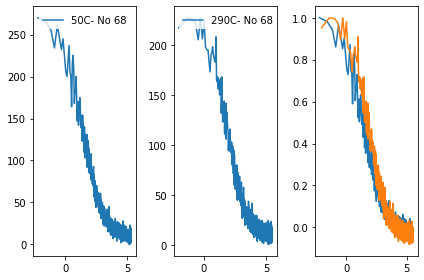

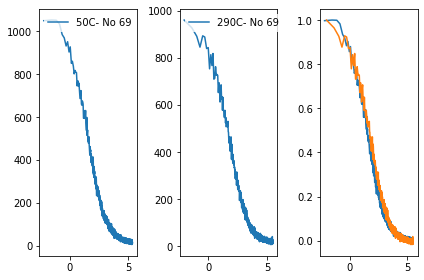

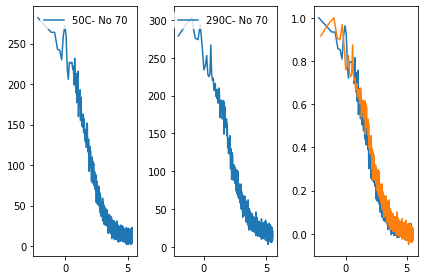

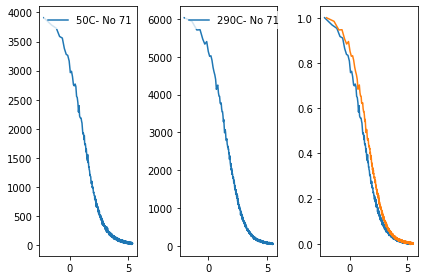

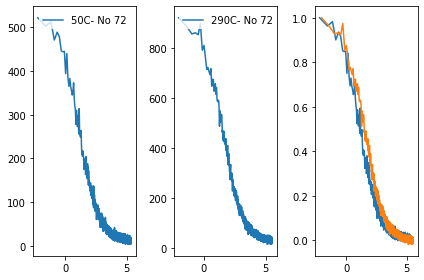

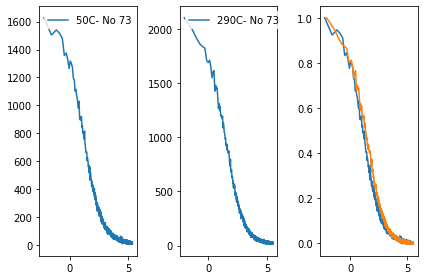

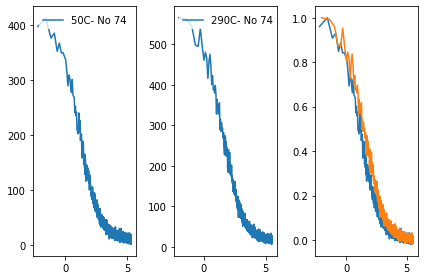

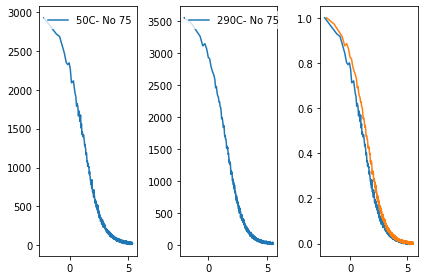

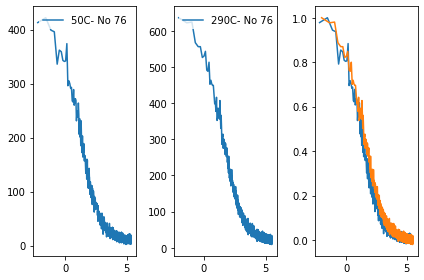

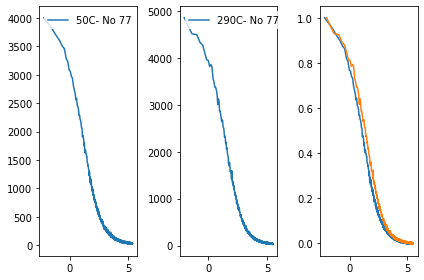

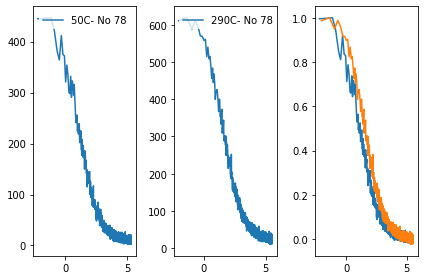

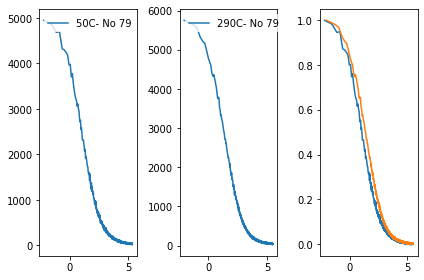

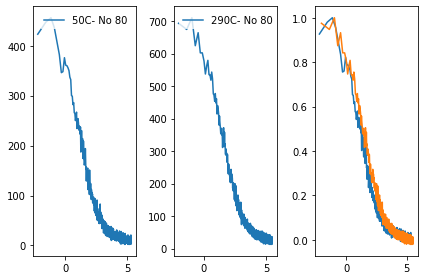

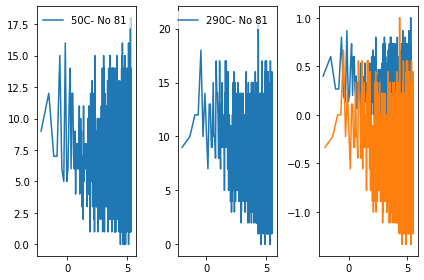

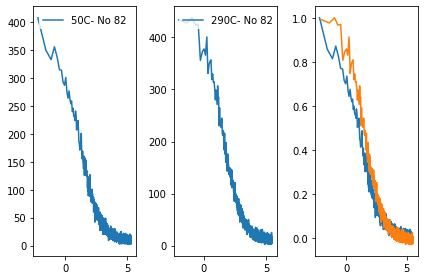

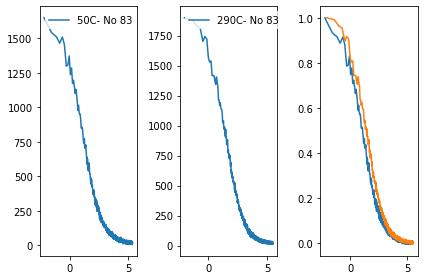

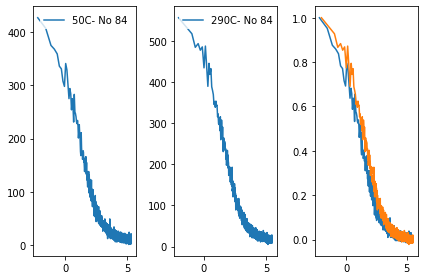

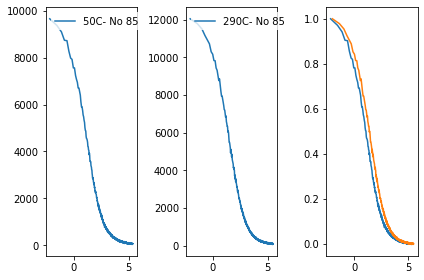

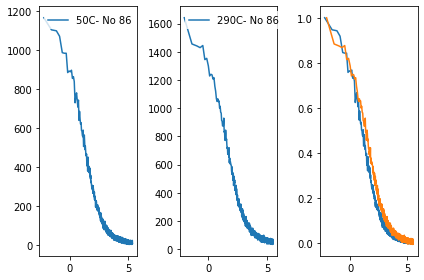

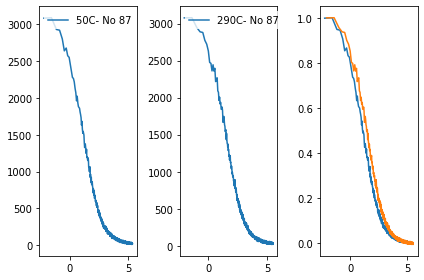

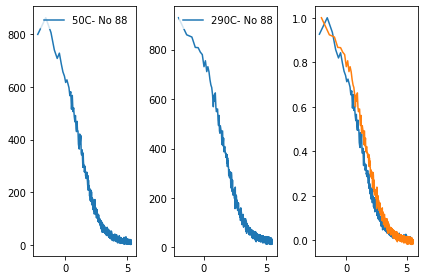

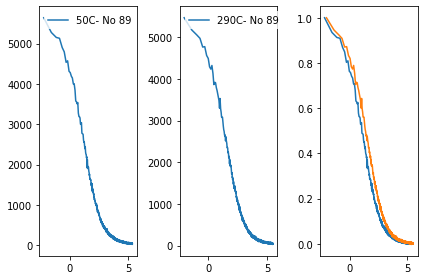

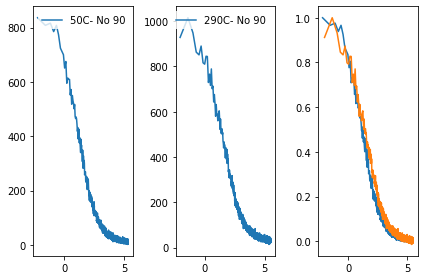

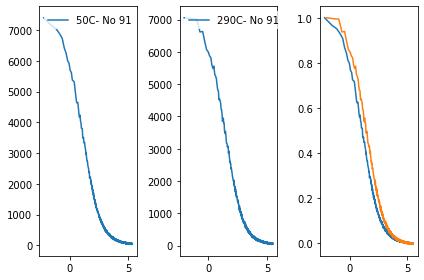

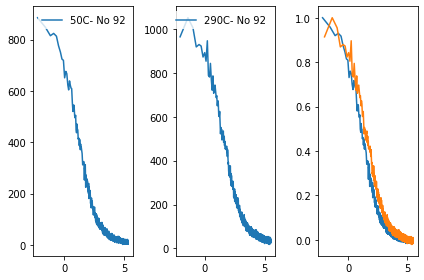

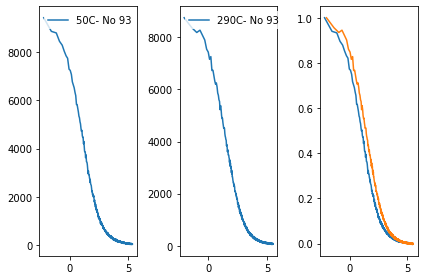

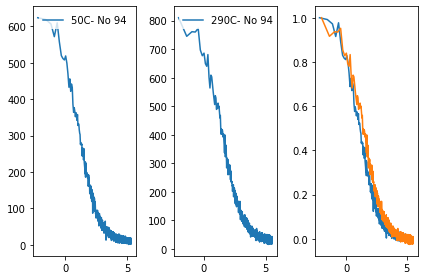

In [38]:
# Tunisia CW-IRSL 290oC  data fitted with KP-CW equation
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

url50='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/IR50LandTallpos.TXT'
df50 =pd.read_table(url50,delimiter='\t')
url290='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/IR290LandTallpos.TXT'
df290 =pd.read_table(url290,delimiter='\t')
mxs=[0]*95
for i in range(1,95,1):
    x_data,y_data = df50.iloc[:, 0].to_numpy(), df50.iloc[:, i].to_numpy()   
    plt.subplot(1,3,1)
    plt.plot(np.log(x_data),y_data,label='50C- No '+str(i))
    x_data2,y_data2 = df290.iloc[:, 0].to_numpy(), df290.iloc[:, i].to_numpy()   
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0) 

    plt.subplot(1,3,2)
    plt.plot(np.log(x_data2),y_data2,label='290C- No '+str(i))
    leg = plt.legend()
    leg.get_frame().set_linewidth(0.0)  
    
    plt.subplot(1,3,3)
    plt.plot(np.log(x_data),(y_data-y_data[-1])/max(y_data-y_data[-1]),label='50C+290C- Normalized')
    plt.plot(np.log(x_data2),(y_data2-y_data2[-1])/max(y_data2-y_data2[-1]))
    
    leg.get_frame().set_linewidth(0.0)  
    plt.tight_layout()
    plt.show()
    mxs[i]=max(y_data2)/max(y_data)

(0.0, 3.0)

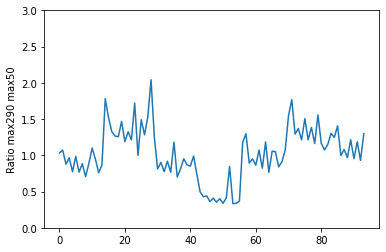

In [42]:
mx = [item for item in mxs if item >0] 
mx
plt.plot(range(len(mx)),mx)
plt.ylabel('Ratio max290 max50')
plt.ylim(0,3)